In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../database/clean_train_data_v2.csv', index_col = 0)

In [3]:
df = df[df['TARGETS'] < 15]

In [4]:
df.head()

,STATION,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPresentWeatherType,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,HourlySeaLevelPressure,...,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS,TARGETS
0,42369099999,124.96,NaN,61.0,100.0,||HZ,9.0,27.0,FEW:01 98,29.62,...,NaN,90.0,10.0,2013,5,5,11,30,0,2.49
1,42369099999,124.96,30.06,55.0,61.0,NaN,NaN,83.0,SCT:04 20 SCT:04 100,NaN,...,NaN,NaN,2.0,2019,1,23,22,0,0,1.24
2,42452099999,273.10,NaN,51.0,67.0,NaN,9.0,57.0,NaN,29.77,...,NaN,230.0,5.0,2005,2,17,8,30,0,2.49
3,42369099999,124.96,NaN,41.0,94.0,||DU,9.0,16.0,NaN,29.55,...,NaN,0.0,0.0,1984,5,20,8,30,0,2.49
4,42503099999,31.00,NaN,55.0,82.0,NaN,9.0,39.0,NaN,30.01,...,NaN,320.0,2.0,2016,11,16,11,30,0,2.49


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919203 entries, 0 to 934805
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    919203 non-null  int64  
 1   ELEVATION                  919203 non-null  float64
 2   HourlyAltimeterSetting     216905 non-null  float64
 3   HourlyDewPointTemperature  901733 non-null  float64
 4   HourlyDryBulbTemperature   907765 non-null  float64
 5   HourlyPresentWeatherType   398149 non-null  object 
 6   HourlyPressureTendency     585592 non-null  float64
 7   HourlyRelativeHumidity     901133 non-null  float64
 8   HourlySkyConditions        498095 non-null  object 
 9   HourlySeaLevelPressure     657190 non-null  float64
 10  HourlyStationPressure      23685 non-null   float64
 11  HourlyWetBulbTemperature   23530 non-null   float64
 12  HourlyWindDirection        848317 non-null  float64
 13  HourlyWindSpeed            90

In [6]:
df.SECONDS.value_counts()

0    919203
Name: SECONDS, dtype: int64

In [7]:
df.drop(['SECONDS'], axis = 1, inplace = True)

In [8]:
df.sort_values(['STATION', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES'], inplace = True)

In [9]:
df.reset_index(inplace = True, drop=True)

In [10]:
df.head()

,STATION,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPresentWeatherType,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,HourlySeaLevelPressure,HourlyStationPressure,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,YEAR,MONTH,DAY,HOUR,MINUTES,TARGETS
0,42030099999,3066.0,NaN,NaN,NaN,NaN,NaN,NaN,0 0,29.78,NaN,NaN,0.0,0.0,1944,1,3,8,30,0.62
1,42030099999,3066.0,NaN,2.0,3.0,NaN,NaN,95.0,0 0,29.77,NaN,NaN,0.0,0.0,1944,1,7,8,30,0.62
2,42030099999,3066.0,NaN,NaN,14.0,NaN,NaN,NaN,0 0,29.74,NaN,NaN,0.0,0.0,1944,1,8,8,30,0.31
3,42030099999,3066.0,NaN,NaN,11.0,NaN,NaN,NaN,0 0,29.71,NaN,NaN,0.0,0.0,1944,1,22,8,30,0.62
4,42030099999,3066.0,NaN,NaN,7.0,NaN,NaN,NaN,0 0,29.49,NaN,NaN,0.0,0.0,1944,2,12,8,30,2.49


In [11]:
df.corr()['TARGETS']

STATION                      0.105594
ELEVATION                    0.043640
HourlyAltimeterSetting      -0.476804
HourlyDewPointTemperature   -0.010298
HourlyDryBulbTemperature     0.203448
HourlyPressureTendency      -0.072720
HourlyRelativeHumidity      -0.221995
HourlySeaLevelPressure      -0.073030
HourlyStationPressure        0.308010
HourlyWetBulbTemperature    -0.063629
HourlyWindDirection          0.147541
HourlyWindSpeed              0.065731
YEAR                        -0.447448
MONTH                       -0.023259
DAY                          0.000570
HOUR                         0.040755
MINUTES                      0.048551
TARGETS                      1.000000
Name: TARGETS, dtype: float64

In [12]:
groups = []
start = 0
for idx in tqdm(range(1, len(df))):
    if df.STATION[idx-1] == df.STATION[idx]:
        continue
    else:
        end = idx-1
        groups.append((start, end))
        start = idx

100%|██████████| 919202/919202 [00:24<00:00, 36919.67it/s]


In [13]:
groups.append((start, len(df)-1))

In [14]:
len(groups) == df.STATION.nunique()

True

In [15]:
groups

[(0, 594),
 (595, 14266),
 (14267, 14268),
 (14269, 14287),
 (14288, 14296),
 (14297, 64891),
 (64892, 81293),
 (81294, 81296),
 (81297, 81297),
 (81298, 87342),
 (87343, 165823),
 (165824, 170019),
 (170020, 171496),
 (171497, 193130),
 (193131, 206304),
 (206305, 209322),
 (209323, 216019),
 (216020, 530931),
 (530932, 632351),
 (632352, 635430),
 (635431, 735392),
 (735393, 736938),
 (736939, 740038),
 (740039, 740049),
 (740050, 776070),
 (776071, 789491),
 (789492, 792470),
 (792471, 795584),
 (795585, 798344),
 (798345, 916266),
 (916267, 919202)]

In [16]:
cols = ['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPressureTendency', 
       'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyWetBulbTemperature', 
       'HourlyWindDirection', 'HourlyWindSpeed']

In [17]:
for start, end in tqdm(groups):
    temp = df[start:end+1]
    for col in cols:
        temp[col] = temp[col].interpolate()
    df[start:end+1] = temp

  0%|          | 0/31 [00:00<?, ?it/s]C:\Users\JAYDEV~1\AppData\Local\Temp/ipykernel_35772/3192420766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[col] = temp[col].interpolate()
100%|██████████| 31/31 [00:07<00:00,  4.41it/s]


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919203 entries, 0 to 919202
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    919203 non-null  int64  
 1   ELEVATION                  919203 non-null  float64
 2   HourlyAltimeterSetting     441470 non-null  float64
 3   HourlyDewPointTemperature  919189 non-null  float64
 4   HourlyDryBulbTemperature   919189 non-null  float64
 5   HourlyPresentWeatherType   398149 non-null  object 
 6   HourlyPressureTendency     861468 non-null  float64
 7   HourlyRelativeHumidity     919189 non-null  float64
 8   HourlySkyConditions        498095 non-null  object 
 9   HourlySeaLevelPressure     911638 non-null  float64
 10  HourlyStationPressure      798621 non-null  float64
 11  HourlyWetBulbTemperature   794412 non-null  float64
 12  HourlyWindDirection        919202 non-null  float64
 13  HourlyWindSpeed            91

In [19]:
interpolated_corr = df.corr().TARGETS

In [20]:
interpolated_corr

STATION                      0.105594
ELEVATION                    0.043640
HourlyAltimeterSetting      -0.388837
HourlyDewPointTemperature   -0.009501
HourlyDryBulbTemperature     0.202677
HourlyPressureTendency      -0.335032
HourlyRelativeHumidity      -0.219021
HourlySeaLevelPressure      -0.053139
HourlyStationPressure       -0.120677
HourlyWetBulbTemperature    -0.070987
HourlyWindDirection          0.145736
HourlyWindSpeed              0.065096
YEAR                        -0.447448
MONTH                       -0.023259
DAY                          0.000570
HOUR                         0.040755
MINUTES                      0.048551
TARGETS                      1.000000
Name: TARGETS, dtype: float64

### Initaial try for interpolation and ml

def fill_interpolate_temporal(date_sorted_data):
    i = 0
    t = 0
    while (i < len(date_sorted_data)):
        prev_val = date_sorted_data[i]
        j = i+1
        while np.isnan(date_sorted_data[j]):
            j = j+1
        next_val = date_sorted_data[j]
        if np.isnan(prev_val):
            for k in range(i, j):
                date_sorted_data[k] = next_val
        else:
            delta = (next_val - prev_val) / (j - i)
            for k in range(i, j):
                date_sorted_data[k] = prev_val + (k - i)*delta
        i = j
        t = t+1
        if (t%10000==0):
            print(t)
    return date_sorted_data

df.HourlyDryBulbTemperature[0:60000].isnull().sum()

fill_interpolate_temporal(df.HourlyDryBulbTemperature).isnull().sum()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919203 entries, 0 to 919202
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    919203 non-null  int64  
 1   ELEVATION                  919203 non-null  float64
 2   HourlyAltimeterSetting     441470 non-null  float64
 3   HourlyDewPointTemperature  919189 non-null  float64
 4   HourlyDryBulbTemperature   919189 non-null  float64
 5   HourlyPresentWeatherType   398149 non-null  object 
 6   HourlyPressureTendency     861468 non-null  float64
 7   HourlyRelativeHumidity     919189 non-null  float64
 8   HourlySkyConditions        498095 non-null  object 
 9   HourlySeaLevelPressure     911638 non-null  float64
 10  HourlyStationPressure      798621 non-null  float64
 11  HourlyWetBulbTemperature   794412 non-null  float64
 12  HourlyWindDirection        919202 non-null  float64
 13  HourlyWindSpeed            91

In [22]:
from sklearn.impute import SimpleImputer

### try ends

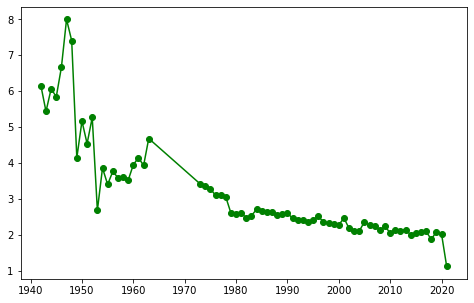

In [23]:
trend = df[['YEAR', 'TARGETS']].groupby('YEAR').mean()
plt.figure(figsize = (8, 5))
plt.plot(trend.index, trend['TARGETS'], '-o', color = 'green')
plt.show()

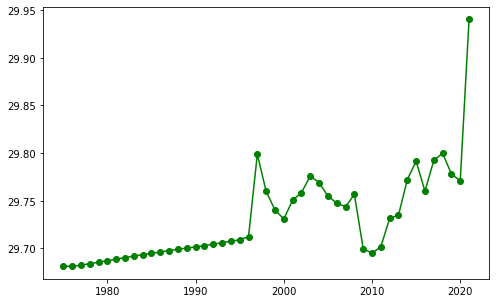

In [24]:
trend = df[['YEAR', 'HourlyAltimeterSetting']].groupby('YEAR').mean()
plt.figure(figsize = (8, 5))
plt.plot(trend.index, trend['HourlyAltimeterSetting'], '-o', color = 'green')
plt.show()

<Figure size 720x720 with 0 Axes>

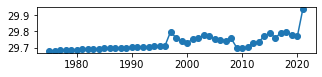

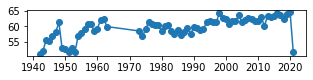

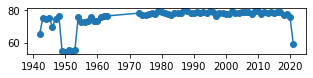

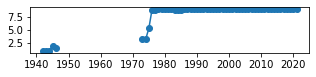

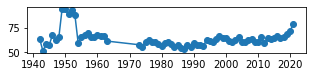

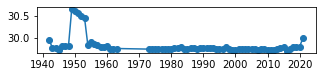

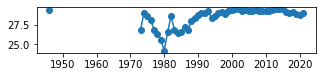

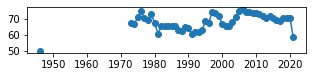

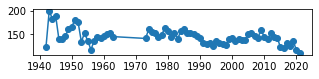

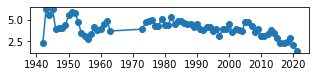

In [25]:
# fig, axs = plt.subplots(10)
i = 1
plt.figure(figsize = (10, 10))
for col in cols:
    trend = df[['YEAR', col]].groupby('YEAR').mean()
#     axs[i].plot(trend.index, trend[col], '-o')
    plt.figure(figsize = (5, 10))
    plt.subplot(10, 1, i)
    plt.plot(trend.index, trend[col], '-o')
    i += 1

In [26]:
df.corr()['TARGETS']

STATION                      0.105594
ELEVATION                    0.043640
HourlyAltimeterSetting      -0.388837
HourlyDewPointTemperature   -0.009501
HourlyDryBulbTemperature     0.202677
HourlyPressureTendency      -0.335032
HourlyRelativeHumidity      -0.219021
HourlySeaLevelPressure      -0.053139
HourlyStationPressure       -0.120677
HourlyWetBulbTemperature    -0.070987
HourlyWindDirection          0.145736
HourlyWindSpeed              0.065096
YEAR                        -0.447448
MONTH                       -0.023259
DAY                          0.000570
HOUR                         0.040755
MINUTES                      0.048551
TARGETS                      1.000000
Name: TARGETS, dtype: float64

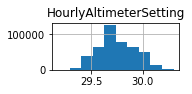

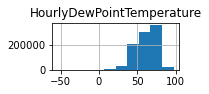

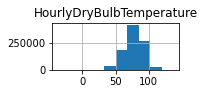

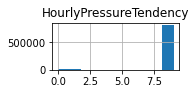

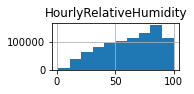

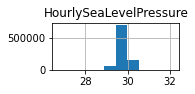

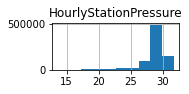

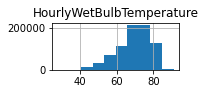

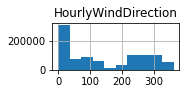

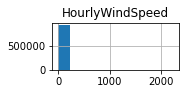

In [27]:
i = 1

    
for col in cols:
    try:
        plt.figure(figsize = (5, 5))
        plt.subplot(5, 2, i)
        plt.title(col)
    #     df[col].hist()
        plt.plot(df[col].hist())
        i += 1
    except:
        pass

In [28]:
groups2 = []
start = 0
for idx in tqdm(range(1, len(df))):
    if df.YEAR[idx-1] == df.YEAR[idx]:
        continue
    else:
        end = idx-1
        groups2.append((start, end))
        start = idx
        
groups2.append((start, len(df)-1))

100%|██████████| 919202/919202 [00:26<00:00, 34751.60it/s]


In [29]:
df[start:end+1][cols].shape

(0, 10)

In [30]:
len(cols)

10

In [31]:
to_be_imputed = ['HourlyDryBulbTemperature', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed']

In [32]:

for start, end in tqdm(groups2):
#     columns = [col for col in cols if np.isnan(df[start:end+1][col]).any()]
    imp1 = SimpleImputer(missing_values=np.nan, strategy='median')
    try:
        df.loc[start:end+1, cols] = imp1.fit_transform(df[to_be_imputed].loc[start:end+1, cols])
    except:
        pass

100%|██████████| 755/755 [00:23<00:00, 32.66it/s]


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919203 entries, 0 to 919202
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    919203 non-null  int64  
 1   ELEVATION                  919203 non-null  float64
 2   HourlyAltimeterSetting     441470 non-null  float64
 3   HourlyDewPointTemperature  919189 non-null  float64
 4   HourlyDryBulbTemperature   919189 non-null  float64
 5   HourlyPresentWeatherType   398149 non-null  object 
 6   HourlyPressureTendency     861468 non-null  float64
 7   HourlyRelativeHumidity     919189 non-null  float64
 8   HourlySkyConditions        498095 non-null  object 
 9   HourlySeaLevelPressure     911638 non-null  float64
 10  HourlyStationPressure      798621 non-null  float64
 11  HourlyWetBulbTemperature   794412 non-null  float64
 12  HourlyWindDirection        919202 non-null  float64
 13  HourlyWindSpeed            91

In [34]:
group_imputed_corr = df.corr()['TARGETS']

In [35]:
interpolated_corr

STATION                      0.105594
ELEVATION                    0.043640
HourlyAltimeterSetting      -0.388837
HourlyDewPointTemperature   -0.009501
HourlyDryBulbTemperature     0.202677
HourlyPressureTendency      -0.335032
HourlyRelativeHumidity      -0.219021
HourlySeaLevelPressure      -0.053139
HourlyStationPressure       -0.120677
HourlyWetBulbTemperature    -0.070987
HourlyWindDirection          0.145736
HourlyWindSpeed              0.065096
YEAR                        -0.447448
MONTH                       -0.023259
DAY                          0.000570
HOUR                         0.040755
MINUTES                      0.048551
TARGETS                      1.000000
Name: TARGETS, dtype: float64

In [36]:
group_imputed_corr

STATION                      0.105594
ELEVATION                    0.043640
HourlyAltimeterSetting      -0.388837
HourlyDewPointTemperature   -0.009501
HourlyDryBulbTemperature     0.202677
HourlyPressureTendency      -0.335032
HourlyRelativeHumidity      -0.219021
HourlySeaLevelPressure      -0.053139
HourlyStationPressure       -0.120677
HourlyWetBulbTemperature    -0.070987
HourlyWindDirection          0.145736
HourlyWindSpeed              0.065096
YEAR                        -0.447448
MONTH                       -0.023259
DAY                          0.000570
HOUR                         0.040755
MINUTES                      0.048551
TARGETS                      1.000000
Name: TARGETS, dtype: float64

#### Earlier version version used imputation for all the remaining values (through the cells below), but it dropped the correlation significantly

#### Now we will do it only for columns for which the reduction is negligible

In [37]:
blind_imputation = ['HourlyWindDirection', 'HourlyWindSpeed', 'HourlySeaLevelPressure', 'HourlyRelativeHumidity', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature']

apply simple imputation to: HourlyDryBulbTemperature, HourlyRelativeHumidity, HourlySeaLevelPressure, HourlyStationPressure, HourlyWetBulbTemperature, HourlyWindDirection, HourlyWindSpeed

In [38]:
imp1 = SimpleImputer(missing_values=np.nan, strategy='median')
# imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# X = [[np.nan, 2], [6, np.nan], [7, 6]]
# print(imp.transform(X))
df[blind_imputation] = imp1.fit_transform(df[blind_imputation])
# df[mode] = imp2.fit_transform(df[mode])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919203 entries, 0 to 919202
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   STATION                    919203 non-null  int64  
 1   ELEVATION                  919203 non-null  float64
 2   HourlyAltimeterSetting     441470 non-null  float64
 3   HourlyDewPointTemperature  919203 non-null  float64
 4   HourlyDryBulbTemperature   919203 non-null  float64
 5   HourlyPresentWeatherType   398149 non-null  object 
 6   HourlyPressureTendency     861468 non-null  float64
 7   HourlyRelativeHumidity     919203 non-null  float64
 8   HourlySkyConditions        498095 non-null  object 
 9   HourlySeaLevelPressure     919203 non-null  float64
 10  HourlyStationPressure      798621 non-null  float64
 11  HourlyWetBulbTemperature   794412 non-null  float64
 12  HourlyWindDirection        919203 non-null  float64
 13  HourlyWindSpeed            91

In [40]:
group_imputed_corr

STATION                      0.105594
ELEVATION                    0.043640
HourlyAltimeterSetting      -0.388837
HourlyDewPointTemperature   -0.009501
HourlyDryBulbTemperature     0.202677
HourlyPressureTendency      -0.335032
HourlyRelativeHumidity      -0.219021
HourlySeaLevelPressure      -0.053139
HourlyStationPressure       -0.120677
HourlyWetBulbTemperature    -0.070987
HourlyWindDirection          0.145736
HourlyWindSpeed              0.065096
YEAR                        -0.447448
MONTH                       -0.023259
DAY                          0.000570
HOUR                         0.040755
MINUTES                      0.048551
TARGETS                      1.000000
Name: TARGETS, dtype: float64

In [41]:
df.corr()['TARGETS']

STATION                      0.105594
ELEVATION                    0.043640
HourlyAltimeterSetting      -0.388837
HourlyDewPointTemperature   -0.009501
HourlyDryBulbTemperature     0.202671
HourlyPressureTendency      -0.335032
HourlyRelativeHumidity      -0.219015
HourlySeaLevelPressure      -0.052846
HourlyStationPressure       -0.120677
HourlyWetBulbTemperature    -0.070987
HourlyWindDirection          0.145736
HourlyWindSpeed              0.065096
YEAR                        -0.447448
MONTH                       -0.023259
DAY                          0.000570
HOUR                         0.040755
MINUTES                      0.048551
TARGETS                      1.000000
Name: TARGETS, dtype: float64

In [43]:
df.head()

,STATION,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPresentWeatherType,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,HourlySeaLevelPressure,HourlyStationPressure,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,YEAR,MONTH,DAY,HOUR,MINUTES,TARGETS
0,42030099999,3066.0,NaN,61.00,81.0,NaN,NaN,66.0,0 0,29.78,NaN,NaN,0.0,0.0,1944,1,3,8,30,0.62
1,42030099999,3066.0,NaN,2.00,3.0,NaN,NaN,95.0,0 0,29.77,NaN,NaN,0.0,0.0,1944,1,7,8,30,0.62
2,42030099999,3066.0,NaN,3.75,14.0,NaN,NaN,95.0,0 0,29.74,NaN,NaN,0.0,0.0,1944,1,8,8,30,0.31
3,42030099999,3066.0,NaN,5.50,11.0,NaN,NaN,95.0,0 0,29.71,NaN,NaN,0.0,0.0,1944,1,22,8,30,0.62
4,42030099999,3066.0,NaN,7.25,7.0,NaN,NaN,95.0,0 0,29.49,NaN,NaN,0.0,0.0,1944,2,12,8,30,2.49


In [42]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

KeyError: "['Unnamed: 0'] not found in axis"

In [44]:
df.to_csv('../database/clean_train_data_v3.csv')